In [1]:
from IPython.core.display import display,HTML

In [2]:
HTML('''<script>
    hideInput = () => $('div.input').hide();
</script>
<body onload="javascript:hideInput()"></body>''')

In [3]:
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

# Assignment 4 - Part 1

Link to questions - [here](https://docs.google.com/document/d/1nU-hHQPcx7af5qNRpUU5I1SlqffbNVrcMItbw5VXFmk/edit?usp=sharing)

***Student Details:***

- Name : Anjishnu Mukherjee
- Registration Number : B05-511017020
- Class Roll Number : CS Gy-70
- Exam Roll Number : 510517086
- Email : 511017020.anjishnu@students.iiests.ac.in

# Project Setup

### Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Load libraries, set seed

In [5]:
%%capture
import platform
import random
import os
import sys
from collections import OrderedDict  
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def get_lib_versions():
  print("------------------------------------")
  output = OrderedDict()
  output["OS"] = platform.platform()
  output["Python version"] = sys.version.replace("\n", " ")
  output["Numpy version"] = np.version.full_version
  output["Pandas version"] = pd.__version__
  output["Matplotlib version"] = matplotlib.__version__
  output["Seaborn version"] = sns.__version__
  output["Scikitlearn version"] = sklearn.__version__
  for kv in output.items():
    print("%s: %s" % kv)
  print("------------------------------------")

def fix_seeds(seed=1337):
  SEED = seed
  random.seed(SEED)
  os.environ['PYTHONHASHSEED'] = str(SEED)
  np.random.seed(SEED)
  plt.rcParams['figure.figsize'] = (7.0, 7.0) 
  plt.rcParams['figure.dpi'] = 90  
  sns.set_style("dark")
  sns.set_context("paper")
  sns.set_palette("colorblind")
  print("Global Seed : ", SEED)
  print("------------------------------------")

In [6]:
print("Environment Information : ")
get_lib_versions()
fix_seeds(5 )

Environment Information : 
------------------------------------
OS: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python version: 3.6.9 (default, Jul 17 2020, 12:50:27)  [GCC 8.4.0]
Numpy version: 1.18.5
Pandas version: 1.0.5
Matplotlib version: 3.2.2
Seaborn version: 0.10.1
Scikitlearn version: 0.22.2.post1
------------------------------------
Global Seed :  5
------------------------------------


### Common functionality for classification

In [7]:
def Classification(model, clf_name, print_result):
    random_state = np.random.RandomState(5)

    # train the model
    model.fit(X_train, y_train)   

    # calculate accuracy scores
    score_train, score_test = model.score(X_train, y_train)*100, model.score(X_test, y_test)*100

    # get predictions on Test-set
    y_pred = model.predict(X_test)

    # confusion matrix 
    cm = confusion_matrix(y_test, y_pred)

    if print_result:
        # Calculating the accuracies
        print('--- '+clf_name+' ---')

        # Print confusion matrix
        plt.rcParams['figure.figsize'] = (4, 4)
        sns.heatmap(cm, annot = True)
        plt.title('Confusion Matrix', fontsize = 14)
        plt.show()
        print("------------------------------------------------")
        print('Training accuracy: %.2f [%%] \nTest accuracy :     %.2f [%%]\n'%(score_train, score_test))   
        print("------------------------------------------------")  
        print("Support Vectors :\n", model.support_vectors_ )
        print("------------------------------------------------")
        df = pd.DataFrame(model.support_vectors_)
        print("\nLet's observe the first 5 support vectors a bit more closely : \n")
        print(df.head())
        print("------------------------------------------------")
    return model, score_train, score_test, model.support_vectors_

In [8]:
clf_dict = dict()         
clf_dict[0] = SVC(kernel='linear', random_state=5)
clf_dict[1] = SVC(kernel='poly', degree=2, random_state=5)
clf_dict[2] = SVC(kernel='poly', degree=3, random_state=5)
clf_dict[3] = SVC(kernel='poly', degree=5, random_state=5)
clf_dict[4] = SVC(kernel='rbf', random_state=5)
clf_dict[5] = SVC(kernel='sigmoid', random_state=5)

clf_names = ['clf1', 'clf2', 'clf3', 'clf4', 'clf5', 'clf6']
train_accuracies = []
test_accuracies = []
support_vectors = []

# Titanic dataset

[Link for data](https://www.kaggle.com/heptapod/titanic/version/1#)



### Pre-Processing

#### Original Data (not given in assignment)

In [9]:
file_path = '/content/drive/My Drive/ML_LAB/Assign_3/titanic/' 
data_path = file_path + 'original.csv'

In [10]:
dataset = pd.read_csv(data_path)
print("Let's visualise the first 5 rows of the original training data.")
dataset.head() 

Let's visualise the first 5 rows of the original training data.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Pre-processed Data (given in assignment)

How is this different from original dataset?

- Original train and test data have been merged.
- The'ticket' and 'cabin' attributes have been removed.
- The 'Survived' attribute has been moved to the last column, now misspelt as ```2urvived```.
- Missing values in 'Age' and 'Fare' attributes have been replaced with the median of the data in those columns.
- ```Sex``` attribute has been binarised.
- ```Embarked``` attribute has been replaced with categorical values (```S-2, C-1, Other-0```)
- Added extra zero columns for categorical inputs to be better suited for One-Hot-Encoding (I will be dropping these initially and creating dummy variables for the categorical features later.)


In [11]:
file_path = '/content/drive/My Drive/ML_LAB/Assign_3/titanic/' 
data_path = file_path + 'data.csv'

In [12]:
dataset = pd.read_csv(data_path)
print("Let's visualise the first 5 rows of the pre-processed dataset.")
dataset.head() 

Let's visualise the first 5 rows of the pre-processed dataset.


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [13]:
print("The number of NaN values in this dataframe : ")
print(len(dataset) - dataset.count())

The number of NaN values in this dataframe : 
Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64


As discussd previously, I will be one-hot encoding the categorical values below. So, all the columns with 0s will be dropped for now. Also, do note that there are no NaN values in this table. So, that requires no extra processing than what has been mentioned in the note above.

#### Let's choose the relevant columns initially.

- ```cols = ["Age", "Fare", "Sex", "sibsp", "Parch", "Pclass", "Embarked", "2urvived"]```

In [14]:
cols = ["Age", "Fare", "Sex", "sibsp", "Parch", "Pclass", "Embarked", "2urvived"]
dataset = dataset[cols]

#### Next, let's fix the typo in the column name for 'Survived', which is the class label

In [15]:
dataset.columns = ['Survived' if x=='2urvived' else x for x in dataset.columns]
dataset.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


#### Now, let's create dummy variables for the following categorical columns

- ```Sex```
- ```sibsp```
- ```Parch```
- ```Pclass```
- ```Embarked```

In [16]:
categorical_cols = ["Sex", "sibsp", "Parch", "Pclass", "Embarked"]
one_hot_categorical_cols = pd.get_dummies(data=dataset, columns=categorical_cols)
print("Dataset after one hot encoding is done for categorical columns:")
one_hot_categorical_cols.head()

Dataset after one hot encoding is done for categorical columns:


,Age,Fare,Survived,Sex_0,Sex_1,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,22.0,7.2500,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,71.2833,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,26.0,7.9250,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,35.0,8.0500,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


#### Also, let's consider the 2 non-categorical columns

- ```Age```
- ```Fare```

In [17]:
column = one_hot_categorical_cols["Age"]
max_value = column.max()
min_value = column.min()

print("Min Age : %d", min_value)
print("Max Age : %d", max_value)

column = one_hot_categorical_cols["Fare"]
max_value = column.max()
min_value = column.min()

print("Min Fare : %d", min_value)
print("Max Fare : %d", max_value)

Min Age : %d 0.17
Max Age : %d 80.0
Min Fare : %d 0.0
Max Fare : %d 512.3292


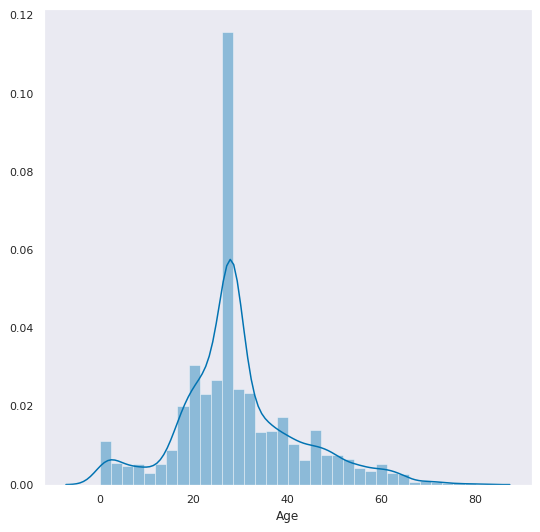

In [18]:
_ = sns.distplot(one_hot_categorical_cols["Age"])

Age clearly has a nearly normal distribution centered around approximately 30 years of age.

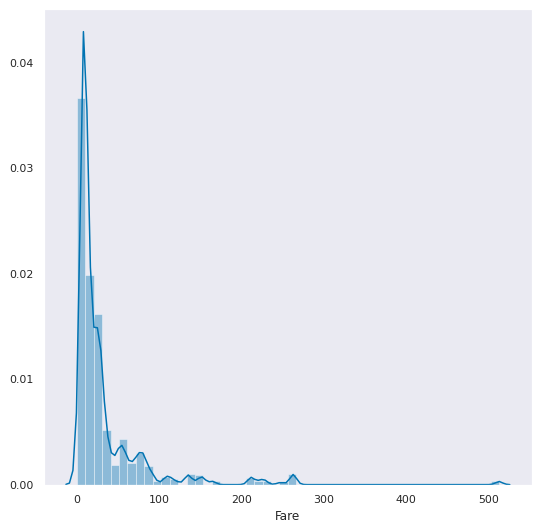

In [19]:
_ = sns.distplot(one_hot_categorical_cols["Fare"])

Clearly, Fare isn't a normal distribution, as there are more people buying lower priced tickets, and very few people buying high priced tickets.

In [20]:
fare = one_hot_categorical_cols["Fare"]
fare.describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

The minimum value is zero, so we can't apply a log-normalisation or a mean-std normalisation. Thus, I choose to use a min_max normalisation. <br>
This will bring all the Fare values within the range ```[0, 1]```, though obviously it won't affect the nature of the curve above.

In [21]:
max_min_normalised_fare = (fare-fare.min())/(fare.max()-fare.min())
max_min_normalised_fare.describe()

count    1309.000000
mean        0.064960
std         0.100993
min         0.000000
25%         0.015412
50%         0.028213
75%         0.061045
max         1.000000
Name: Fare, dtype: float64

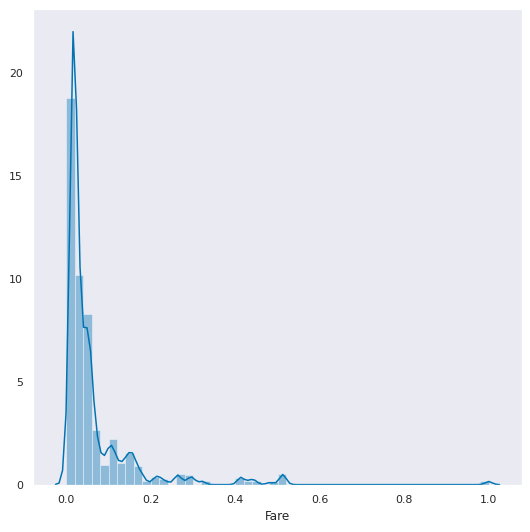

In [22]:
_ = sns.distplot(max_min_normalised_fare)

As we can see, the nature of the curve remains the same, but the scale changes.

In [23]:
one_hot_categorical_cols["Fare"] = max_min_normalised_fare

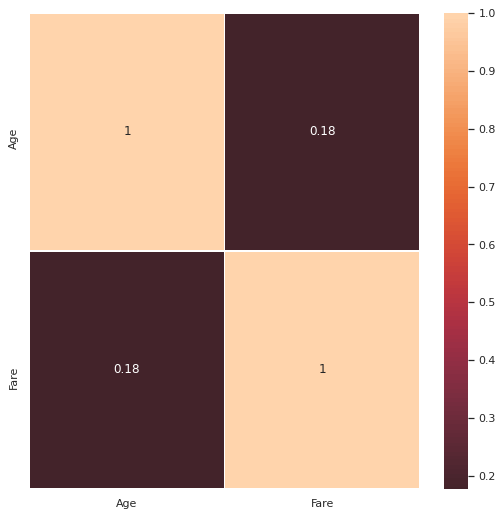

In [24]:
non_categorical = one_hot_categorical_cols[["Age", "Fare"]]
cor = non_categorical.corr()
sns.heatmap(cor, annot = True, center= 0, linewidth=0.5)
plt.show()

There is very less correlation (0.18) between Age and Fare, so there is no meaning of dropping either.

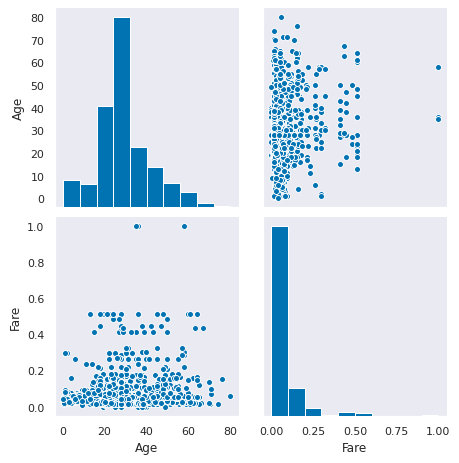

In [25]:
sns.pairplot(non_categorical, height=2.5)
plt.show();

The paired distributions of Fare vs Age also doesn't reveal any interesting patterns, which is expected as they are not highly correlated.

#### Distribution of class labels in the dataset

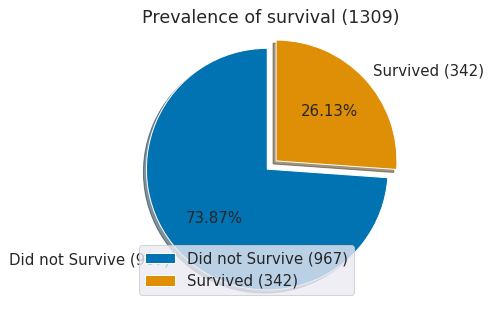

In [26]:
sum_D = len(one_hot_categorical_cols.Survived)
sum_M = (one_hot_categorical_cols.Survived.values==1).sum()
sum_B = sum_D - sum_M
frac_B = sum_B/sum_D
frac_M = 1 - frac_B
labels = 'Did not Survive ('+str(sum_B)+')', 'Survived ('+str(sum_M)+')'
sizes = [frac_B, frac_M]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize': 12})

ax1.set_title('Prevalence of survival ('+str(sum_D)+')', fontsize=14)
ax1.axis('equal')
ax1.legend(fontsize=12, loc='best')
plt.show()

The dataset is pretty unbalanced, as the percentage of survivors from Titanic is very low (approx 30%).

### Train : Test split

I am splitting the dataset in the ratio of ```80%``` training data and ```20%``` testing data, with a fixed random seed of 5, to ensure the same split every time this code is executed. 

Also, I am using random shuffling to ensure that with this fixed seed, I am able to shuffle the original data in a particular order so that the training set is the same every time and so is the testing set.

In [27]:
y = one_hot_categorical_cols["Survived"].values
x = one_hot_categorical_cols.drop("Survived", axis=1)

In [28]:
train_ratio = 0.80
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1 - train_ratio, random_state = 5, shuffle = True)
print("------------------------------------")
print("The shapes of the different data : (n_samples,n_features)")
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("------------------------------------")

------------------------------------
The shapes of the different data : (n_samples,n_features)
x train:  (1047, 25)
x test:  (262, 25)
y train:  (1047,)
y test:  (262,)
------------------------------------


Let's also observe the distribution of class labels in training and testing data.

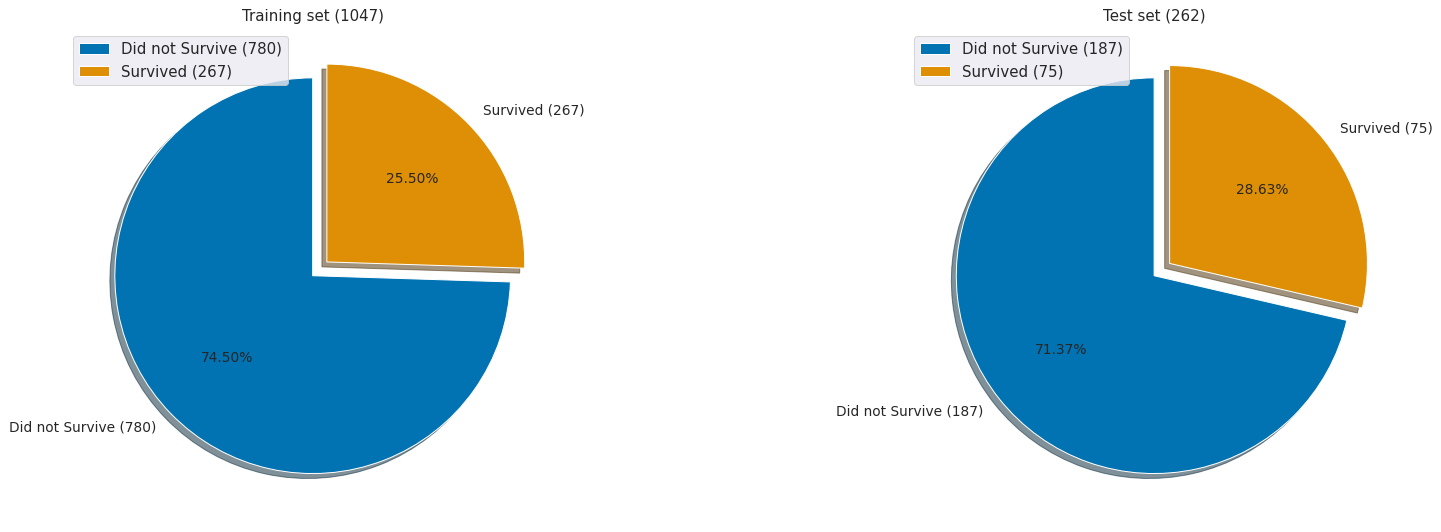

In [29]:
sum_tr  = len(y_train)
sum_tr_M = (y_train==1).sum()
sum_tr_B = sum_tr - sum_tr_M
frac_tr_B = sum_tr_B/sum_tr
frac_tr_M = 1 - frac_tr_B
sizes_tr = [frac_tr_B, frac_tr_M]
explode_tr = (0, 0.1)  # only "explode" the 2nd slice 
labels_tr = 'Did not Survive ('+str(sum_tr_B)+')', 'Survived ('+str(sum_tr_M)+')'

sum_ts   = len(y_test)
sum_ts_M = (y_test==1).sum()
sum_ts_B = sum_ts - sum_ts_M
frac_ts_B = sum_ts_B/sum_ts
frac_ts_M = 1 - frac_ts_B
sizes_ts = [frac_ts_B, frac_ts_M]
explode_ts = (0, 0.1)  # only "explode" the 2nd slice 
labels_ts = 'Did not Survive ('+str(sum_ts_B)+')', 'Survived ('+str(sum_ts_M)+')'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axes[0].pie(sizes_tr, explode=explode_tr, labels=labels_tr, autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize': 11})
axes[0].set_title('Training set ('+str(sum_tr)+')', fontsize=12)
axes[0].legend(fontsize=12, loc='best')

axes[1].pie(sizes_ts, explode=explode_ts, labels=labels_ts, autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize': 11})
axes[1].set_title('Test set ('+str(sum_ts)+')', fontsize=12)
axes[1].legend(fontsize=12, loc='best')

plt.tight_layout()
plt.show()

The distribution of the class labels in the taining and testing data are similar and mirror the distribution of the original dataset.

### SVM classifiers - Exploring different Kernels

[SVM in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Train the SVM using the below kernels with parameters, present the support vectors in the table of the comparison of the model along with accuracy.

- Linear
- Polynomial:  where degree d is set to 2, 3 and  5
- RBF
- Sigmoid 

--- clf1 - SVM, Linear Kernel ---


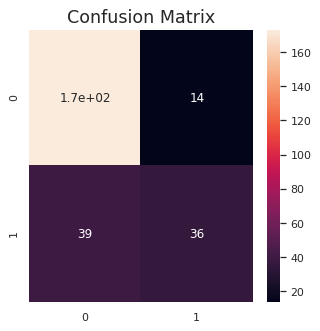

------------------------------------------------
Training accuracy: 79.37 [%] 
Test accuracy :     79.77 [%]

------------------------------------------------
Support Vectors :
 [[3.60000000e+01 5.12121894e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.80000000e+01 2.82207221e-02 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.80000000e+01 2.82127195e-02 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.80000000e+01 1.57125536e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.00000000e+01 7.61229303e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.80000000e+01 5.85561003e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
------------------------------------------------

Let's observe the first 5 support vectors a bit more closely : 

     0         1    2    3    4    5    6   ...   18   19   20   21   22   23   24
0  36.0  0.512122  0.0  

In [30]:
name = 'clf1 - SVM, Linear Kernel'
_, train_score, test_score, supports = Classification(clf_dict[0], name, True)
print('\nSupport Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])
train_accuracies.append(train_score)
test_accuracies.append(test_score)
support_vectors.append(supports)

--- clf2 - SVM, Polynomial Kernel, degree = 2 ---


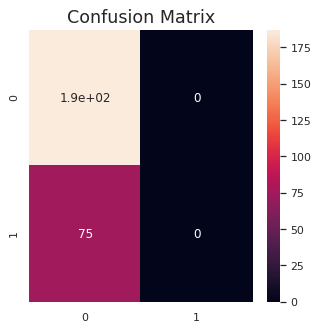

------------------------------------------------
Training accuracy: 74.50 [%] 
Test accuracy :     71.37 [%]

------------------------------------------------
Support Vectors :
 [[3.60000000e+01 5.12121894e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.80000000e+01 2.82207221e-02 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.80000000e+01 2.82127195e-02 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.80000000e+01 1.57125536e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.00000000e+01 7.61229303e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.80000000e+01 5.85561003e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
------------------------------------------------

Let's observe the first 5 support vectors a bit more closely : 

     0         1    2    3    4    5    6   ...   18   19   20   21   22   23   24
0  36.0  0.512122  0.0  

In [31]:
name = 'clf2 - SVM, Polynomial Kernel, degree = 2'
_, train_score, test_score, supports = Classification(clf_dict[1], name, True)
print('Support Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])
train_accuracies.append(train_score)
test_accuracies.append(test_score)
support_vectors.append(supports)

--- clf3 - SVM, Polynomial Kernel, degree = 3 ---


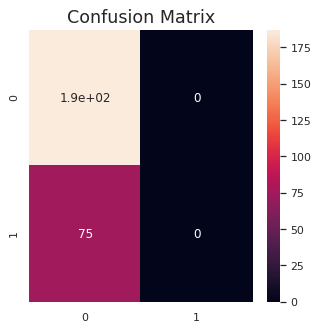

------------------------------------------------
Training accuracy: 74.50 [%] 
Test accuracy :     71.37 [%]

------------------------------------------------
Support Vectors :
 [[4.10000000e+01 5.95320353e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.60000000e+01 5.12121894e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.80000000e+01 2.82207221e-02 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.80000000e+01 1.57125536e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.00000000e+01 7.61229303e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.80000000e+01 5.85561003e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
------------------------------------------------

Let's observe the first 5 support vectors a bit more closely : 

     0         1    2    3    4    5    6   ...   18   19   20   21   22   23   24
0  41.0  0.059532  1.0  

In [32]:
name = 'clf3 - SVM, Polynomial Kernel, degree = 3'
_, train_score, test_score, supports = Classification(clf_dict[2], name, True)
print('\nSupport Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])
train_accuracies.append(train_score)
test_accuracies.append(test_score)
support_vectors.append(supports)

--- clf4 - SVM, Polynomial Kernel, degree = 5 ---


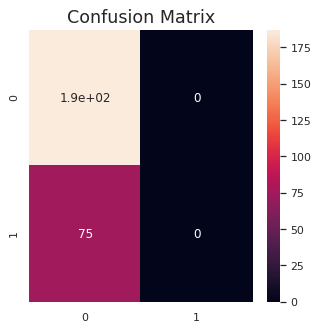

------------------------------------------------
Training accuracy: 74.50 [%] 
Test accuracy :     71.37 [%]

------------------------------------------------
Support Vectors :
 [[4.10000000e+01 5.95320353e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.60000000e+01 5.12121894e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.80000000e+01 2.82207221e-02 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.80000000e+01 1.57125536e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.00000000e+01 7.61229303e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.80000000e+01 5.85561003e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
------------------------------------------------

Let's observe the first 5 support vectors a bit more closely : 

     0         1    2    3    4    5    6   ...   18   19   20   21   22   23   24
0  41.0  0.059532  1.0  

In [33]:
name = 'clf4 - SVM, Polynomial Kernel, degree = 5'
_, train_score, test_score, supports = Classification(clf_dict[3], name, True)
print('\nSupport Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])
train_accuracies.append(train_score)
test_accuracies.append(test_score)
support_vectors.append(supports)

--- clf5 - SVM, RBF Kernel ---


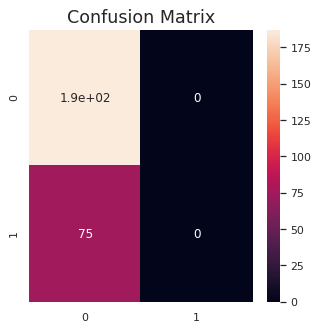

------------------------------------------------
Training accuracy: 74.50 [%] 
Test accuracy :     71.37 [%]

------------------------------------------------
Support Vectors :
 [[4.10000000e+01 5.95320353e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.60000000e+01 5.12121894e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.80000000e+01 2.82207221e-02 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.80000000e+01 1.57125536e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.00000000e+01 7.61229303e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.80000000e+01 5.85561003e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
------------------------------------------------

Let's observe the first 5 support vectors a bit more closely : 

     0         1    2    3    4    5    6   ...   18   19   20   21   22   23   24
0  41.0  0.059532  1.0  

In [34]:
name = 'clf5 - SVM, RBF Kernel'
_, train_score, test_score, supports = Classification(clf_dict[4], name, True)
print('\nSupport Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])
train_accuracies.append(train_score)
test_accuracies.append(test_score)
support_vectors.append(supports)

--- clf6 - SVM, Sigmoid Kernel ---


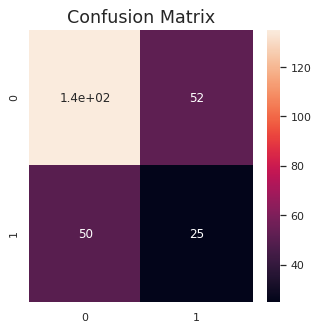

------------------------------------------------
Training accuracy: 64.28 [%] 
Test accuracy :     61.07 [%]

------------------------------------------------
Support Vectors :
 [[4.10000000e+01 5.95320353e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.25962291e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [5.00000000e+01 2.53743101e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [2.70000000e+01 1.52163882e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.80000000e+01 1.57125536e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.80000000e+01 5.85561003e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
------------------------------------------------

Let's observe the first 5 support vectors a bit more closely : 

     0         1    2    3    4    5    6   ...   18   19   20   21   22   23   24
0  41.0  0.059532  1.0  

In [35]:
name = 'clf6 - SVM, Sigmoid Kernel'
_, train_score, test_score, supports = Classification(clf_dict[5], name, True)
print('\nSupport Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])
train_accuracies.append(train_score)
test_accuracies.append(test_score)
support_vectors.append(supports)

#### Compare the different models

In [36]:
train_results = pd.DataFrame(train_accuracies)
test_results = pd.DataFrame(test_accuracies)
support_results = pd.DataFrame(support_vectors)
results = pd.concat([train_results, test_results, support_results], axis=1, ignore_index=True)
results.columns = ["Accuracy (Training)", "Accuracy (Testing)", "Support_Vectors"]
file_path = '/content/drive/My Drive/ML_LAB/Assign_3/titanic/' 
results_path = file_path + 'results.csv'
results.to_csv (results_path, index = False, header=True)

- ```Model 0``` - Linear kernel
- ```Model 1``` - Polynomial kernel (degree = 2)
- ```Model 2``` - Polynomial kernel (degree = 3)
- ```Model 3``` - Polynomial kernel (degree = 5)
- ```Model 4``` - RBF kernel
- ```Model 5``` - Sigmoid kernel

In [37]:
results

,Accuracy (Training),Accuracy (Testing),Support_Vectors
0,79.369628,79.770992,"[[36.0, 0.5121218935012878, 0.0, 1.0, 1.0, 0.0..."
1,74.498567,71.374046,"[[36.0, 0.5121218935012878, 0.0, 1.0, 1.0, 0.0..."
2,74.498567,71.374046,"[[41.0, 0.05953203526170282, 1.0, 0.0, 1.0, 0...."
3,74.498567,71.374046,"[[41.0, 0.05953203526170282, 1.0, 0.0, 1.0, 0...."
4,74.498567,71.374046,"[[41.0, 0.05953203526170282, 1.0, 0.0, 1.0, 0...."
5,64.278892,61.068702,"[[41.0, 0.05953203526170282, 1.0, 0.0, 1.0, 0...."


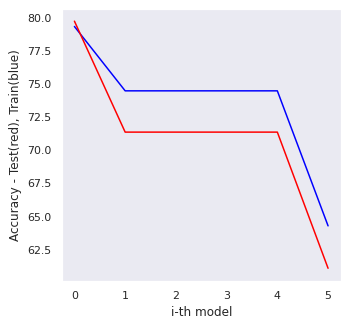

In [38]:
_ = plt.plot(train_accuracies, 'b', test_accuracies, 'r')
plt.ylabel('Accuracy - Test(red), Train(blue)')
_ = plt.xlabel('i-th model')
plt.show()

Clearly, for all the models, training accuracy is greater than testing acuracy, as expected. The Linear Kernel had the best performance in terms of accuracy and the Sigmoid Kernel had the worst performance. All the other kernels give approximatel the same performance on test set.

In order of decreasing test accuracy :<br>
```Linear``` > ```Polynomial (degree=3) = Polynomial (degree=5) = Polynomial (degree=2) = RBF``` > ```Sigmoid```